In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('Linear Regression_ Problem Data Set.txt')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [6]:
df


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


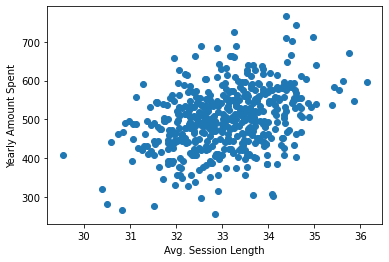

In [7]:
# avg session length and amount spent
plt.xlabel("Avg. Session Length")
plt.ylabel("Yearly Amount Spent")
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'])

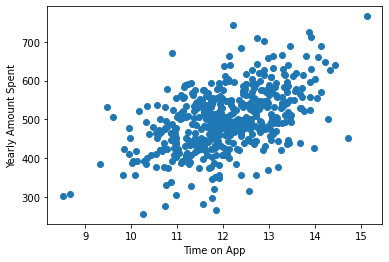

In [8]:
# Time on app and amount spent
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.scatter(df['Time on App'],df['Yearly Amount Spent'])

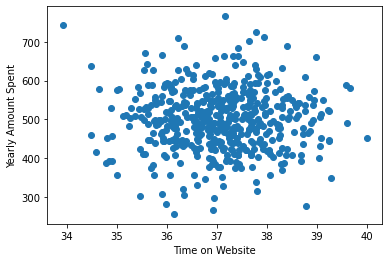

In [9]:
# Time on website and amoutn spent
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'])

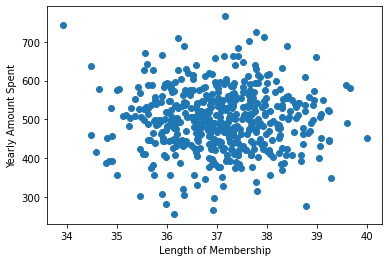

In [10]:
# Length of membership and amount spent
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'])

In [11]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

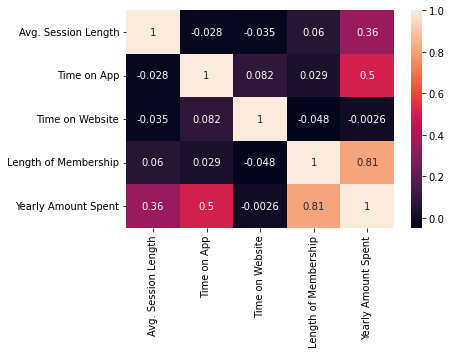

In [12]:
sns.heatmap(df.corr(),annot=True)

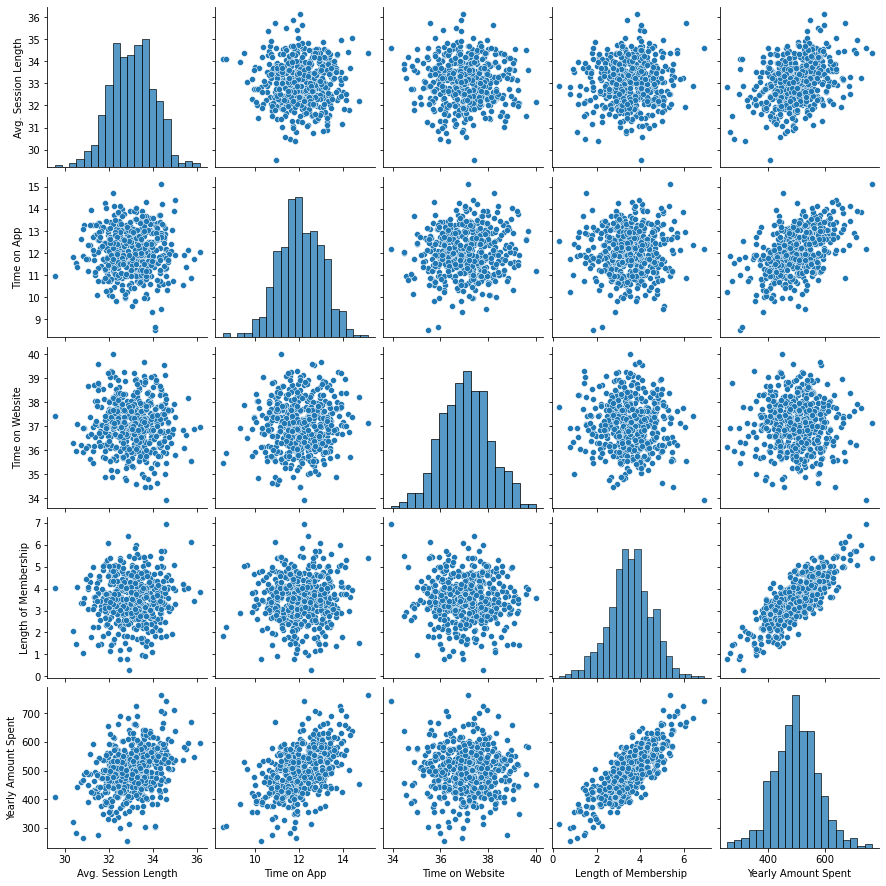

In [42]:
sns.pairplot(df)

In [13]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [14]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
X = df.drop('Yearly Amount Spent',axis='columns')
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [16]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=80)

In [19]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
398,34.140393,11.568527,38.918749,4.082855
147,32.255901,10.480507,37.338670,4.514122
148,32.692392,12.296518,36.951555,1.825885
492,33.680937,11.201570,37.835448,2.208814
61,33.076536,9.607315,36.493993,5.081210
...,...,...,...,...
10,33.992573,13.338975,37.225806,2.482608
211,34.081646,12.104542,36.059646,3.974522
422,33.894570,13.300299,36.393684,4.490002
188,32.283123,10.902556,36.094242,4.789202


In [20]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
256,34.379394,12.930929,36.360247,3.792712
231,34.173752,12.144749,37.258031,3.397363
444,31.268104,12.132509,35.456798,3.072076
459,33.976083,11.658037,37.425279,2.086348
353,33.551651,11.936895,35.900253,4.543332
...,...,...,...,...
30,33.241900,12.305418,36.163648,3.062368
136,32.686129,12.215252,36.594362,3.897116
477,31.061325,12.357638,36.166042,4.089331
453,33.676831,10.971392,37.722367,3.629340


In [21]:
y_train

398    537.825282
147    479.731938
148    424.185494
492    403.819520
61     507.212569
          ...    
10     492.606013
211    548.518529
422    630.156728
188    524.637965
175    373.885724
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [22]:
y_test

256    574.654843
231    512.552534
444    423.470533
459    407.876378
353    558.948112
          ...    
30     497.586671
136    529.230090
477    487.555458
453    478.183060
97     614.715334
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
X_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
256,34.379394,12.930929,36.360247,3.792712
231,34.173752,12.144749,37.258031,3.397363
444,31.268104,12.132509,35.456798,3.072076
459,33.976083,11.658037,37.425279,2.086348
353,33.551651,11.936895,35.900253,4.543332


In [45]:
y_pred = model.predict(X_test)
y_pred

array([583.9835909 , 524.04267671, 426.56164354, 419.23003041,
       569.5602762 , 610.71336697, 606.90637657, 460.34442944,
       505.31633423, 397.15634031, 576.04010795, 455.7464428 ,
       549.39922464, 556.90381664, 524.29690954, 347.61368658,
       684.89605949, 525.7993846 , 434.76712301, 506.96979304,
       411.28038133, 458.48462259, 456.60647444, 615.51780961,
       505.06245868, 564.07793299, 279.43356308, 534.70322405,
       554.04722428, 536.8510414 , 507.92100806, 506.4563167 ,
       421.94366506, 371.71464689, 490.71120285, 370.32906576,
       456.79744798, 561.59589486, 507.6947516 , 545.24504971,
       473.05040633, 503.68964107, 531.51977228, 508.75562509,
       495.50875506, 639.25182778, 555.56602861, 444.4940958 ,
       495.41390585, 642.23310869, 432.72529055, 573.64455716,
       445.82540159, 481.50877262, 313.57044191, 505.7990002 ,
       481.41396778, 423.78850722, 478.6203857 , 437.85900414,
       348.93740139, 576.91371026, 408.63043749, 547.87

In [27]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [28]:

model.predict([[33.715981,12.418808,35.771016,2.735160]])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([481.22294163])

In [29]:
model.predict([[34.497268,12.655651,39.577668,4.082621]])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595.77981427])

In [44]:
model.score(X_test,y_test)

0.9833854306536455

In [31]:
model.predict([[34.497268,12.655651,39.577668,4.082621]])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595.77981427])

model.coef_

In [32]:
model.coef_

array([26.18401981, 38.98567837,  0.49306384, 61.58933793])

In [33]:
model.intercept_

-1071.8467152751807

In [34]:
y = 34.497268*25.53109187 + 12.655651*38.76447213 + 39.577668*0.33758077 + 4.082621*61.50469456 + -1041.4911259214578
y

594.3124403745462

In [35]:

from sklearn import metrics

In [36]:
# mean absolute error(mae)
metrics.mean_absolute_error(y_test,y_pred)

7.7397221743868885

In [37]:
#mean squared error
metrics.mean_squared_error(y_test,y_pred)

99.21772161630406

In [38]:
# rmse root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

9.960809285208912

In [39]:
#r2 score
metrics.r2_score(y_test,y_pred)

0.9833854306536455

In [40]:
model.coef_

array([26.18401981, 38.98567837,  0.49306384, 61.58933793])

In [41]:
coefficient = pd.DataFrame(model.coef_,X.columns)
coefficient

,0
Avg. Session Length,26.184020
Time on App,38.985678
Time on Website,0.493064
Length of Membership,61.589338
